# CPLEX Refinery Optimization Results Visualization

This notebook visualizes the results from the CPLEX optimization run for refinery scheduling.
- Production Schedule Analysis
- Vessel Schedule and Activities
- Crude Oil Inventory Tracking
- Demurrage Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the CPLEX optimization results
production_file = 'cplex-tools/results/cplex_production_schedule_throughput_6_vessels_10_demurrage_20250821_104330.csv'
vessel_file = 'cplex-tools/results/cplex_vessel_schedule_throughput_6_vessels_10_demurrage_20250821_104330.csv'

# Read the data
production_df = pd.read_csv(production_file)
vessel_df = pd.read_csv(vessel_file)

# Convert date columns
production_df['Date'] = pd.to_datetime(production_df['Date'])
vessel_df['Activity Date'] = pd.to_datetime(vessel_df['Activity Date'])

print(f"Production data shape: {production_df.shape}")
print(f"Vessel data shape: {vessel_df.shape}")
print("\nProduction data columns:")
print(production_df.columns.tolist())
print("\nVessel data columns:")
print(vessel_df.columns.tolist())

Production data shape: (80, 19)
Vessel data shape: (48, 6)

Production data columns:
['Date', 'Slot', 'Final Product', 'Quantity Produced', 'Crude Tapis Available', 'Crude Minas Available', 'Crude Tapis3rd Available', 'Crude Sepat Available', 'Crude KimC Available', 'Crude Kimanis Available', 'Crude Bintulu Available', 'Crude Tapis Blended', 'Crude Minas Blended', 'Crude Tapis3rd Blended', 'Crude Sepat Blended', 'Crude KimC Blended', 'Crude Kimanis Blended', 'Crude Bintulu Blended', 'Flag']

Vessel data columns:
['Activity Date', 'Activity Name', 'Vessel ID', 'Location', 'is_at_Melaka', 'is Demurrage Day']


In [3]:
# Display first few rows to understand the data structure
print("Production Schedule (First 10 rows):")
display(production_df.head(10))

print("\nVessel Schedule (First 10 rows):")
display(vessel_df.head(10))

Production Schedule (First 10 rows):


,Date,Slot,Final Product,Quantity Produced,Crude Tapis Available,Crude Minas Available,Crude Tapis3rd Available,Crude Sepat Available,Crude KimC Available,Crude Kimanis Available,Crude Bintulu Available,Crude Tapis Blended,Crude Minas Blended,Crude Tapis3rd Blended,Crude Sepat Blended,Crude KimC Blended,Crude Kimanis Blended,Crude Bintulu Blended,Flag
0,2025-10-01,1,F3,95.0,208.1,0.0,662.7,309.2,0.0,0.0,0.0,69.3,0.0,0.0,25.6,0.0,0.0,0.0,Optimization
1,2025-10-01,2,F3,95.0,208.1,0.0,662.7,309.2,0.0,0.0,0.0,69.3,0.0,0.0,25.6,0.0,0.0,0.0,Optimization
2,2025-10-02,1,F3,95.0,69.3,0.0,662.7,257.9,0.0,0.0,0.0,69.3,0.0,0.0,25.6,0.0,0.0,0.0,Optimization
3,2025-10-02,2,F3,95.0,69.3,0.0,662.7,257.9,0.0,0.0,0.0,69.3,0.0,0.0,25.6,0.0,0.0,0.0,Optimization
4,2025-10-03,1,F3,47.5,34.7,0.0,593.4,219.5,0.0,0.0,0.0,34.7,0.0,0.0,12.8,0.0,0.0,0.0,Optimization
5,2025-10-03,2,F6,95.0,34.7,0.0,593.4,219.5,0.0,0.0,0.0,0.0,0.0,69.3,25.6,0.0,0.0,0.0,Optimization
6,2025-10-04,1,F6,95.0,34.7,0.0,454.7,168.2,0.0,0.0,0.0,0.0,0.0,69.3,25.6,0.0,0.0,0.0,Optimization
7,2025-10-04,2,F6,95.0,34.7,0.0,454.7,168.2,0.0,0.0,0.0,0.0,0.0,69.3,25.6,0.0,0.0,0.0,Optimization
8,2025-10-05,1,F6,95.0,34.7,0.0,316.0,116.9,0.0,0.0,0.0,0.0,0.0,69.3,25.6,0.0,0.0,0.0,Optimization
9,2025-10-05,2,F6,95.0,34.7,0.0,316.0,116.9,0.0,0.0,0.0,0.0,0.0,69.3,25.6,0.0,0.0,0.0,Optimization



Vessel Schedule (First 10 rows):


,Activity Date,Activity Name,Vessel ID,Location,is_at_Melaka,is Demurrage Day
0,2025-10-01,Discharge,1,Melaka,1,0
1,2025-10-03,Demurrage,1,Melaka,1,1
2,2025-10-10,Demurrage,1,Melaka,1,1
3,2025-10-22,Demurrage,1,Melaka,1,1
4,2025-10-28,Pickup Kimani from PM,1,PM,0,0
5,2025-10-29,Demurrage,1,PM,0,1
6,2025-11-01,Demurrage,1,Melaka,1,1
7,2025-11-05,Demurrage,1,Melaka,1,1
8,2025-10-01,Demurrage,2,PM,0,1
9,2025-10-04,Demurrage,2,Melaka,1,1


## 1. Production Schedule Visualization

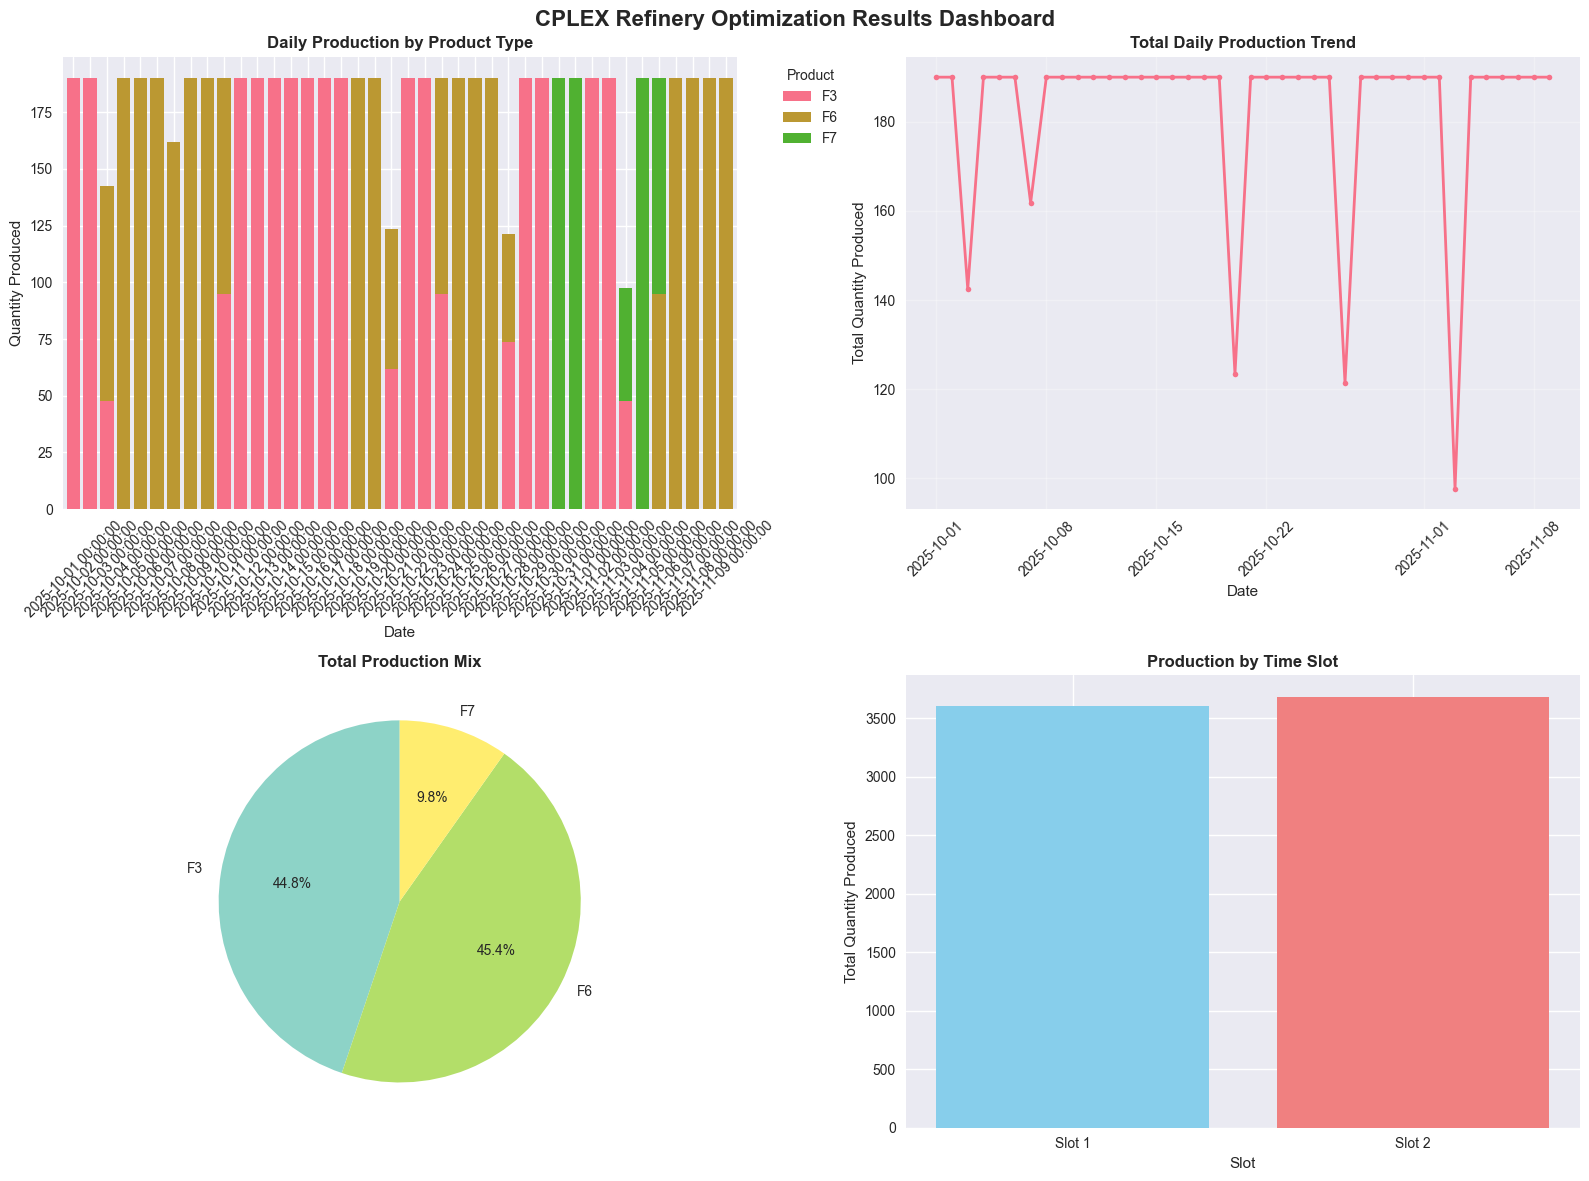


=== PRODUCTION SUMMARY ===
Total Production: 7296.8 units
Average Daily Production: 182.4 units
Production Days: 40 days

Production by Product:
  F3: 3270.6 units (44.8%)
  F6: 3311.0 units (45.4%)
  F7: 715.2 units (9.8%)


In [4]:
# Create production timeline chart
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('CPLEX Refinery Optimization Results Dashboard', fontsize=16, fontweight='bold')

# 1. Daily Production by Product
daily_production = production_df.groupby(['Date', 'Final Product'])['Quantity Produced'].sum().reset_index()
pivot_production = daily_production.pivot(index='Date', columns='Final Product', values='Quantity Produced').fillna(0)

ax1 = axes[0, 0]
pivot_production.plot(kind='bar', stacked=True, ax=ax1, width=0.8)
ax1.set_title('Daily Production by Product Type', fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity Produced')
ax1.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# 2. Total Production Over Time
ax2 = axes[0, 1]
daily_total = production_df.groupby('Date')['Quantity Produced'].sum().reset_index()
ax2.plot(daily_total['Date'], daily_total['Quantity Produced'], marker='o', linewidth=2, markersize=4)
ax2.set_title('Total Daily Production Trend', fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Quantity Produced')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. Product Mix Analysis
ax3 = axes[1, 0]
product_totals = production_df.groupby('Final Product')['Quantity Produced'].sum()
colors = plt.cm.Set3(np.linspace(0, 1, len(product_totals)))
wedges, texts, autotexts = ax3.pie(product_totals.values, labels=product_totals.index, autopct='%1.1f%%', 
                                   colors=colors, startangle=90)
ax3.set_title('Total Production Mix', fontweight='bold')

# 4. Slot Utilization
ax4 = axes[1, 1]
slot_production = production_df.groupby('Slot')['Quantity Produced'].sum()
ax4.bar(slot_production.index, slot_production.values, color=['skyblue', 'lightcoral'])
ax4.set_title('Production by Time Slot', fontweight='bold')
ax4.set_xlabel('Slot')
ax4.set_ylabel('Total Quantity Produced')
ax4.set_xticks([1, 2])
ax4.set_xticklabels(['Slot 1', 'Slot 2'])

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== PRODUCTION SUMMARY ===")
print(f"Total Production: {production_df['Quantity Produced'].sum():.1f} units")
print(f"Average Daily Production: {daily_total['Quantity Produced'].mean():.1f} units")
print(f"Production Days: {len(daily_total)} days")
print(f"\nProduction by Product:")
for product, total in product_totals.items():
    print(f"  {product}: {total:.1f} units ({total/product_totals.sum()*100:.1f}%)")

## 2. Crude Oil Inventory Analysis

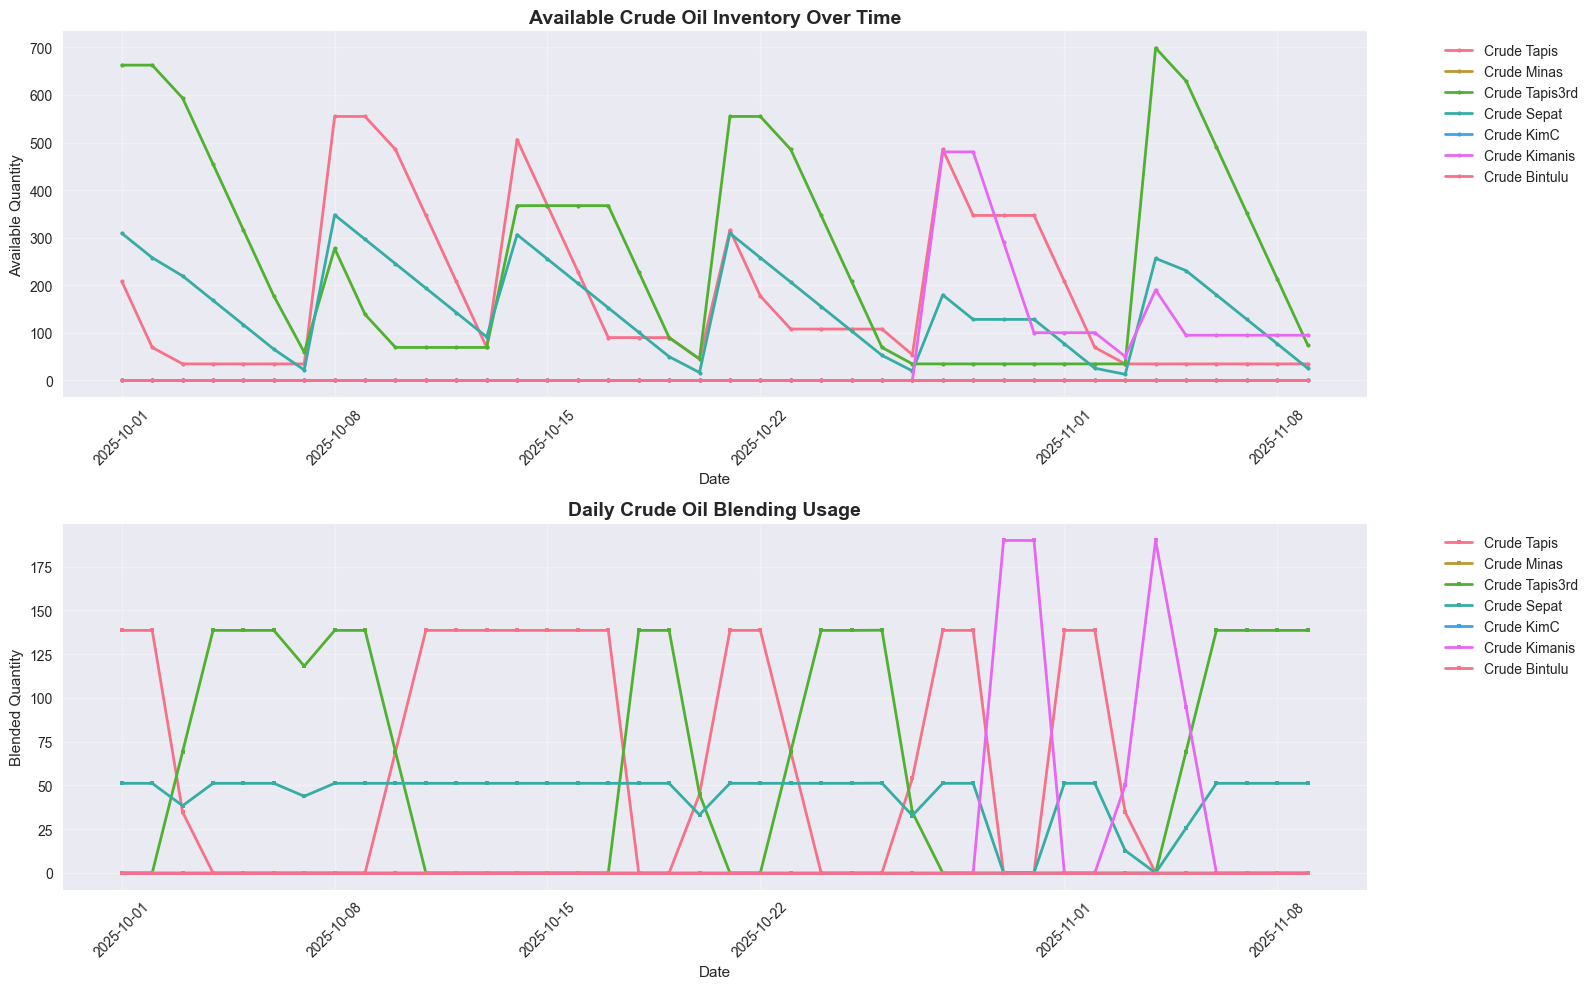


=== CRUDE OIL UTILIZATION SUMMARY ===
Crude Tapis:
  Max Available: 554.8
  Total Used: 2386.0
  Utilization: 430.1%

Crude Minas:
  Max Available: 0.0
  Total Used: 0.0
  Utilization: 0.0%

Crude Tapis3rd:
  Max Available: 698.8
  Total Used: 2415.6
  Utilization: 345.7%

Crude Sepat:
  Max Available: 347.8
  Total Used: 1773.9
  Utilization: 510.0%

Crude KimC:
  Max Available: 0.0
  Total Used: 0.0
  Utilization: 0.0%

Crude Kimanis:
  Max Available: 480.3
  Total Used: 715.2
  Utilization: 148.9%

Crude Bintulu:
  Max Available: 0.0
  Total Used: 0.0
  Utilization: 0.0%



In [5]:
# Crude oil inventory tracking
crude_columns = [col for col in production_df.columns if 'Available' in col]
blended_columns = [col for col in production_df.columns if 'Blended' in col]

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# 1. Available Crude Oil Inventory Over Time
ax1 = axes[0]
for col in crude_columns:
    crude_name = col.replace(' Available', '')
    daily_avg = production_df.groupby('Date')[col].mean()
    ax1.plot(daily_avg.index, daily_avg.values, marker='o', label=crude_name, linewidth=2, markersize=3)

ax1.set_title('Available Crude Oil Inventory Over Time', fontweight='bold', fontsize=14)
ax1.set_xlabel('Date')
ax1.set_ylabel('Available Quantity')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Crude Oil Blending Usage Over Time
ax2 = axes[1]
for col in blended_columns:
    crude_name = col.replace(' Blended', '')
    daily_total = production_df.groupby('Date')[col].sum()
    ax2.plot(daily_total.index, daily_total.values, marker='s', label=crude_name, linewidth=2, markersize=3)

ax2.set_title('Daily Crude Oil Blending Usage', fontweight='bold', fontsize=14)
ax2.set_xlabel('Date')
ax2.set_ylabel('Blended Quantity')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Crude utilization summary
print("\n=== CRUDE OIL UTILIZATION SUMMARY ===")
for i, crude_col in enumerate(crude_columns):
    crude_name = crude_col.replace(' Available', '')
    blended_col = blended_columns[i]
    
    total_available = production_df[crude_col].max()
    total_used = production_df[blended_col].sum()
    utilization = (total_used / total_available * 100) if total_available > 0 else 0
    
    print(f"{crude_name}:")
    print(f"  Max Available: {total_available:.1f}")
    print(f"  Total Used: {total_used:.1f}")
    print(f"  Utilization: {utilization:.1f}%")
    print()

## 3. Vessel Schedule and Demurrage Analysis

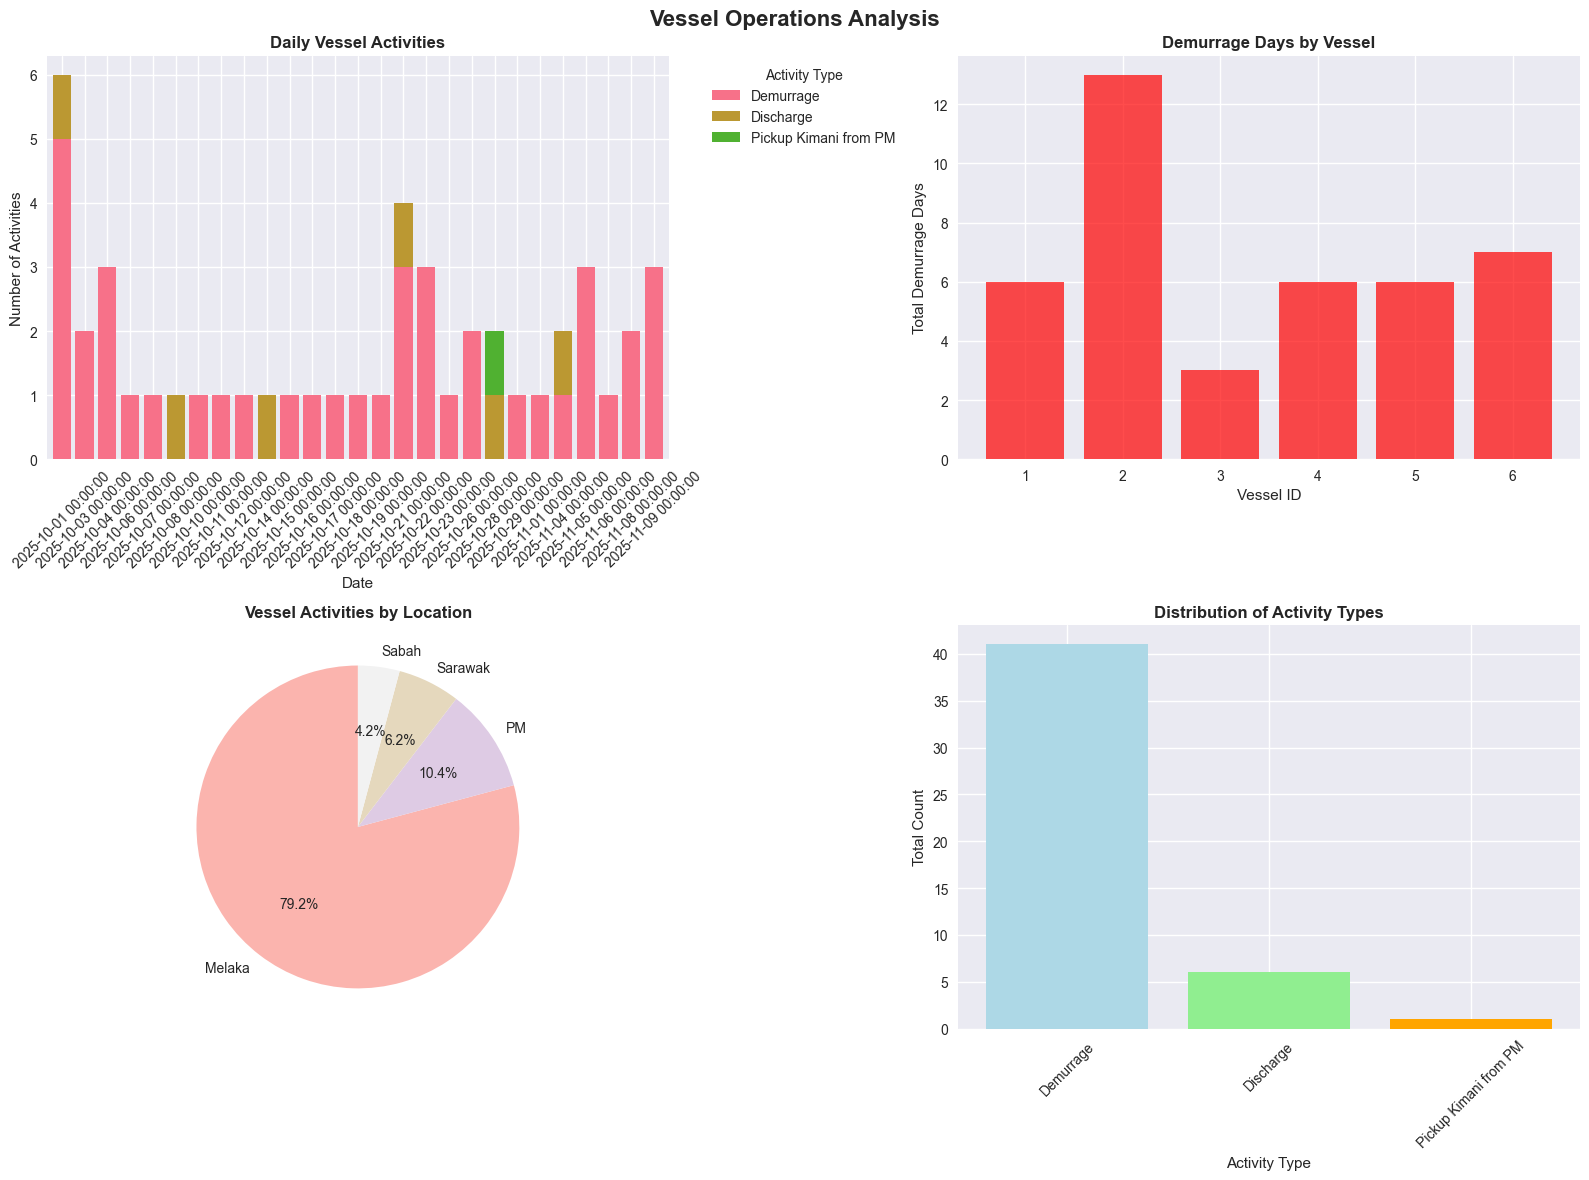


=== VESSEL OPERATIONS SUMMARY ===
Total Vessels: 6
Total Activities: 48
Total Demurrage Days: 41
Schedule Duration: 40 days

Activity Breakdown:
  Demurrage: 41 activities (85.4%)
  Discharge: 6 activities (12.5%)
  Pickup Kimani from PM: 1 activities (2.1%)

Demurrage by Vessel:
  Vessel 1: 6 days
  Vessel 2: 13 days
  Vessel 3: 3 days
  Vessel 4: 6 days
  Vessel 5: 6 days
  Vessel 6: 7 days


In [6]:
# Vessel activities analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Vessel Operations Analysis', fontsize=16, fontweight='bold')

# 1. Vessel Activities Timeline
ax1 = axes[0, 0]
activity_counts = vessel_df.groupby(['Activity Date', 'Activity Name']).size().reset_index(name='Count')
activity_pivot = activity_counts.pivot(index='Activity Date', columns='Activity Name', values='Count').fillna(0)
activity_pivot.plot(kind='bar', stacked=True, ax=ax1, width=0.8)
ax1.set_title('Daily Vessel Activities', fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Activities')
ax1.legend(title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# 2. Demurrage Days Analysis
ax2 = axes[0, 1]
demurrage_days = vessel_df[vessel_df['is Demurrage Day'] == 1]
vessel_demurrage = demurrage_days.groupby('Vessel ID').size().reset_index(name='Demurrage Days')
ax2.bar(vessel_demurrage['Vessel ID'], vessel_demurrage['Demurrage Days'], 
        color='red', alpha=0.7)
ax2.set_title('Demurrage Days by Vessel', fontweight='bold')
ax2.set_xlabel('Vessel ID')
ax2.set_ylabel('Total Demurrage Days')
ax2.set_xticks(vessel_demurrage['Vessel ID'])

# 3. Location Distribution
ax3 = axes[1, 0]
location_counts = vessel_df['Location'].value_counts()
colors = plt.cm.Pastel1(np.linspace(0, 1, len(location_counts)))
wedges, texts, autotexts = ax3.pie(location_counts.values, labels=location_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax3.set_title('Vessel Activities by Location', fontweight='bold')

# 4. Activity Type Distribution
ax4 = axes[1, 1]
activity_type_counts = vessel_df['Activity Name'].value_counts()
ax4.bar(range(len(activity_type_counts)), activity_type_counts.values, 
        color=['lightblue', 'lightgreen', 'orange', 'pink'][:len(activity_type_counts)])
ax4.set_title('Distribution of Activity Types', fontweight='bold')
ax4.set_xlabel('Activity Type')
ax4.set_ylabel('Total Count')
ax4.set_xticks(range(len(activity_type_counts)))
ax4.set_xticklabels(activity_type_counts.index, rotation=45)

plt.tight_layout()
plt.show()

# Vessel operations summary
print("\n=== VESSEL OPERATIONS SUMMARY ===")
print(f"Total Vessels: {vessel_df['Vessel ID'].nunique()}")
print(f"Total Activities: {len(vessel_df)}")
print(f"Total Demurrage Days: {vessel_df['is Demurrage Day'].sum()}")
print(f"Schedule Duration: {(vessel_df['Activity Date'].max() - vessel_df['Activity Date'].min()).days + 1} days")

print("\nActivity Breakdown:")
for activity, count in activity_type_counts.items():
    print(f"  {activity}: {count} activities ({count/len(vessel_df)*100:.1f}%)")

print("\nDemurrage by Vessel:")
for _, row in vessel_demurrage.iterrows():
    print(f"  Vessel {row['Vessel ID']}: {row['Demurrage Days']} days")

## 4. Interactive Plotly Visualization

In [ ]:
# Create interactive Plotly dashboard
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        'Daily Production Timeline', 'Crude Oil Inventory Levels',
        'Vessel Activities Timeline', 'Demurrage Analysis',
        'Production vs Demurrage Correlation', 'Resource Utilization'
    ),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]],
    vertical_spacing=0.08
)

# 1. Daily Production Timeline
daily_production_plotly = production_df.groupby(['Date', 'Final Product'])['Quantity Produced'].sum().reset_index()
for product in daily_production_plotly['Final Product'].unique():
    product_data = daily_production_plotly[daily_production_plotly['Final Product'] == product]
    fig.add_trace(
        go.Scatter(x=product_data['Date'], y=product_data['Quantity Produced'],
                  mode='lines+markers', name=f'Production {product}',
                  line=dict(width=2), marker=dict(size=4)),
        row=1, col=1
    )

# 2. Crude Oil Inventory
for col in crude_columns[:3]:  # Show top 3 crudes to avoid clutter
    crude_name = col.replace(' Available', '')
    daily_avg = production_df.groupby('Date')[col].mean().reset_index()
    fig.add_trace(
        go.Scatter(x=daily_avg['Date'], y=daily_avg[col],
                  mode='lines+markers', name=f'{crude_name} Available',
                  line=dict(width=2), marker=dict(size=3)),
        row=1, col=2
    )

# 3. Vessel Activities
vessel_daily = vessel_df.groupby(['Activity Date', 'Activity Name']).size().reset_index(name='Count')
for activity in vessel_daily['Activity Name'].unique():
    activity_data = vessel_daily[vessel_daily['Activity Name'] == activity]
    fig.add_trace(
        go.Scatter(x=activity_data['Activity Date'], y=activity_data['Count'],
                  mode='lines+markers', name=f'{activity}',
                  line=dict(width=2), marker=dict(size=4)),
        row=2, col=1
    )

# 4. Demurrage by Vessel
fig.add_trace(
    go.Bar(x=vessel_demurrage['Vessel ID'], y=vessel_demurrage['Demurrage Days'],
           name='Demurrage Days', marker_color='red', opacity=0.7),
    row=2, col=2
)

# 5. Production vs Demurrage Correlation
daily_demurrage = vessel_df.groupby('Activity Date')['is Demurrage Day'].sum().reset_index()
daily_demurrage.columns = ['Date', 'Demurrage Count']
daily_total_production = production_df.groupby('Date')['Quantity Produced'].sum().reset_index()
correlation_data = pd.merge(daily_total_production, daily_demurrage, on='Date', how='inner')

fig.add_trace(
    go.Scatter(x=correlation_data['Quantity Produced'], y=correlation_data['Demurrage Count'],
              mode='markers', name='Production vs Demurrage',
              marker=dict(size=8, color='purple', opacity=0.6)),
    row=3, col=1
)

# 6. Resource Utilization Summary
utilization_data = []
for i, crude_col in enumerate(crude_columns[:4]):  # Top 4 crudes
    crude_name = crude_col.replace(' Available', '').replace('Crude ', '')
    if i < len(blended_columns):
        blended_col = blended_columns[i]
        total_available = production_df[crude_col].max()
        total_used = production_df[blended_col].sum()
        utilization = (total_used / total_available * 100) if total_available > 0 else 0
        utilization_data.append({'Crude': crude_name, 'Utilization': utilization})

util_df = pd.DataFrame(utilization_data)
fig.add_trace(
    go.Bar(x=util_df['Crude'], y=util_df['Utilization'],
           name='Utilization %', marker_color='lightgreen'),
    row=3, col=2
)

# Update layout
fig.update_layout(
    height=1200,
    title_text="CPLEX Refinery Optimization - Interactive Dashboard",
    title_x=0.5,
    title_font_size=20,
    showlegend=True
)

# Update axes labels
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Quantity", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Available Quantity", row=1, col=2)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Activity Count", row=2, col=1)
fig.update_xaxes(title_text="Vessel ID", row=2, col=2)
fig.update_yaxes(title_text="Demurrage Days", row=2, col=2)
fig.update_xaxes(title_text="Production Quantity", row=3, col=1)
fig.update_yaxes(title_text="Demurrage Count", row=3, col=1)
fig.update_xaxes(title_text="Crude Type", row=3, col=2)
fig.update_yaxes(title_text="Utilization %", row=3, col=2)

fig.show()

print("\n=== INTERACTIVE DASHBOARD CREATED ===")
print("The dashboard shows:")
print("1. Production timeline by product type")
print("2. Crude oil inventory levels over time")
print("3. Vessel activities and scheduling")
print("4. Demurrage analysis by vessel")
print("5. Correlation between production and demurrage")
print("6. Resource utilization efficiency")

## 5. Summary Report

In [7]:
# Generate comprehensive summary report
print("="*60)
print("          CPLEX REFINERY OPTIMIZATION SUMMARY REPORT")
print("="*60)

# Optimization performance
optimization_period = (production_df['Date'].max() - production_df['Date'].min()).days + 1
total_production = production_df['Quantity Produced'].sum()
total_demurrage = vessel_df['is Demurrage Day'].sum()
total_vessels = vessel_df['Vessel ID'].nunique()

print(f"\nOptimization Period: {optimization_period} days")
print(f"Total Production: {total_production:.1f} units")
print(f"Average Daily Production: {total_production/optimization_period:.1f} units/day")
print(f"Number of Vessels: {total_vessels}")
print(f"Total Demurrage Days: {total_demurrage}")
print(f"Average Demurrage per Vessel: {total_demurrage/total_vessels:.1f} days")

# Production efficiency
print("\n" + "-"*40)
print("PRODUCTION EFFICIENCY ANALYSIS")
print("-"*40)

slot_utilization = production_df.groupby('Slot')['Quantity Produced'].sum()
max_possible_production = optimization_period * 2 * 95  # Assuming max 95 per slot
actual_production_efficiency = (total_production / max_possible_production) * 100

print(f"Slot 1 Production: {slot_utilization.get(1, 0):.1f} units")
print(f"Slot 2 Production: {slot_utilization.get(2, 0):.1f} units")
print(f"Production Efficiency: {actual_production_efficiency:.1f}%")

# Resource utilization
print("\n" + "-"*40)
print("CRUDE OIL RESOURCE UTILIZATION")
print("-"*40)

total_crude_utilization = 0
crude_count = 0
for i, crude_col in enumerate(crude_columns):
    if i < len(blended_columns):
        crude_name = crude_col.replace(' Available', '').replace('Crude ', '')
        blended_col = blended_columns[i]
        
        total_available = production_df[crude_col].max()
        total_used = production_df[blended_col].sum()
        utilization = (total_used / total_available * 100) if total_available > 0 else 0
        
        if total_available > 0:
            print(f"{crude_name:15}: {utilization:6.1f}% utilized ({total_used:6.1f}/{total_available:6.1f})")
            total_crude_utilization += utilization
            crude_count += 1

avg_utilization = total_crude_utilization / crude_count if crude_count > 0 else 0
print(f"{'Average':15}: {avg_utilization:6.1f}% utilization")

# Vessel operations
print("\n" + "-"*40)
print("VESSEL OPERATIONS ANALYSIS")
print("-"*40)

vessel_efficiency = []
for vessel_id in vessel_df['Vessel ID'].unique():
    vessel_data = vessel_df[vessel_df['Vessel ID'] == vessel_id]
    total_activities = len(vessel_data)
    demurrage_days = vessel_data['is Demurrage Day'].sum()
    productive_activities = total_activities - demurrage_days
    efficiency = (productive_activities / total_activities * 100) if total_activities > 0 else 0
    
    print(f"Vessel {vessel_id}: {efficiency:5.1f}% efficiency ({productive_activities}/{total_activities} productive activities)")
    vessel_efficiency.append(efficiency)

avg_vessel_efficiency = np.mean(vessel_efficiency) if vessel_efficiency else 0
print(f"Average Vessel Efficiency: {avg_vessel_efficiency:.1f}%")

# Final assessment
print("\n" + "="*40)
print("OPTIMIZATION ASSESSMENT")
print("="*40)

if avg_utilization > 80:
    util_grade = "Excellent"
elif avg_utilization > 60:
    util_grade = "Good"
elif avg_utilization > 40:
    util_grade = "Moderate"
else:
    util_grade = "Poor"

if avg_vessel_efficiency > 80:
    vessel_grade = "Excellent"
elif avg_vessel_efficiency > 60:
    vessel_grade = "Good"
elif avg_vessel_efficiency > 40:
    vessel_grade = "Moderate"
else:
    vessel_grade = "Poor"

print(f"Resource Utilization: {util_grade} ({avg_utilization:.1f}%)")
print(f"Vessel Efficiency: {vessel_grade} ({avg_vessel_efficiency:.1f}%)")
print(f"Production Rate: {total_production/optimization_period:.1f} units/day")
print(f"Demurrage Impact: {total_demurrage} days across {total_vessels} vessels")

print(f"\nCPLEX successfully optimized the refinery schedule with:")
print(f"- {len(production_df)} production decisions")
print(f"- {len(vessel_df)} vessel activities")
print(f"- {optimization_period} day planning horizon")
print(f"- Multi-objective optimization balancing throughput and demurrage")

          CPLEX REFINERY OPTIMIZATION SUMMARY REPORT

Optimization Period: 40 days
Total Production: 7296.8 units
Average Daily Production: 182.4 units/day
Number of Vessels: 6
Total Demurrage Days: 41
Average Demurrage per Vessel: 6.8 days

----------------------------------------
PRODUCTION EFFICIENCY ANALYSIS
----------------------------------------
Slot 1 Production: 3610.1 units
Slot 2 Production: 3686.7 units
Production Efficiency: 96.0%

----------------------------------------
CRUDE OIL RESOURCE UTILIZATION
----------------------------------------
Tapis          :  430.1% utilized (2386.0/ 554.8)
Tapis3rd       :  345.7% utilized (2415.6/ 698.8)
Sepat          :  510.0% utilized (1773.9/ 347.8)
Kimanis        :  148.9% utilized ( 715.2/ 480.3)
Average        :  358.7% utilization

----------------------------------------
VESSEL OPERATIONS ANALYSIS
----------------------------------------
Vessel 1:  25.0% efficiency (2/8 productive activities)
Vessel 2:   7.1% efficiency (1/14 p